# Quantum Entanglement with Classiq

Entanglement is an important aspect to study quantum algorithms. In this tutorial, we show how to create a bell pair state $|\Phi^{+}\rangle$ of 2 qubits, using the Hadamard and the Controlled-NOT transformation.

In [10]:
from classiq import *


@qfunc
def my_bell_state(reg: QArray) -> None:
    H(reg[0])
    CX(reg[0], reg[1])


@qfunc
def main(registers: Output[QArray]) -> None:
    allocate(2, registers)
    my_bell_state(registers)


model = create_model(main, out_file="entanglement")


qprog = synthesize(model)

show(qprog)

Quantum program link: https://platform.classiq.io/circuit/2zJHAuuniJKwF8l4cVdhJpmUxXl


### Mathematical Background

Alice has a qubit which is initially set to $|0\rangle$<br>
Bob has a qubit which is initally set to $|0\rangle$

Alice applies 2x2 Hadamard Matrix (H) to create a superposition of her qubit's state. It is defined as:<br>

$$H \cdot \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \end{pmatrix} \cdot \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \end{pmatrix} = \frac{1}{\sqrt{2}} \left| 0 \right\rangle + \frac{1}{\sqrt{2}} \left| 1 \right\rangle$$

Alice and Bob combine their qubits and generate the composite quantum state as:
$$\begin{pmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \end{pmatrix} \otimes \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} \frac{1}{\sqrt{2}} \\ 0 \\ \frac{1}{\sqrt{2}} \\ 0 \end{pmatrix}$$

Alice now applies the Controlled NOT gate operation, with her qubit being the control qubit and Bob's qubit as the target qubit. The Controlled NOT qubit when applied only affects the target qubit by inverting its state if the control qubit is $|1\rangle$. The 4x4 matrix for Controlled NOT(CNOT) transformation matrix is defined as: <br>
$$\text{CNOT} = \begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{pmatrix}$$
The new quantum state is:
$$\begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix} \begin{pmatrix} \frac{1}{\sqrt{2}} \\ 0 \\ \frac{1}{\sqrt{2}}\\ 0 \end{pmatrix} = \begin{pmatrix} \frac{1}{\sqrt{2}} \\ 0 \\ 0 \\ \frac{1}{\sqrt{2}} \end{pmatrix} = \frac{1}{\sqrt{2}} \left| 00 \right\rangle + \frac{1}{\sqrt{2}} \left| 11 \right\rangle$$

In this situation the qubit's of Alice and Bob are correlated to each other.<br>
If we measure both the qubits we will either get the state $|00\rangle$ or the state $|11\rangle$ with equal probability.

It is described as:
- When Alice observes her state as $|0\rangle$ then the state of Bob's qubit collapses to the state $|0\rangle$
- When Alice observes her state as $|1\rangle$ then the state of Bob's qubit collapses to the state $|1\rangle$ 

The resultant entangled state is designated as a bell pair state $|\Phi^{+}\rangle$
$$|\Phi^{+}\rangle = \frac{1}{\sqrt{2}} \left( |00\rangle + |11\rangle \right)$$



### GHZ State

The GHZ state, a highly entangeld state entengaling all qubits in a circuit.

$$
|GHZ\rangle = \frac{|0\rangle^{\otimes n} + |1\rangle^{\otimes n}}{\sqrt{2}}
$$

Create a function that will generate a GHZ state for `n` qubits. Use the Classiq build in `repeat` no classical loops. An example circuit is shown below. As you can see to create this circuit, there are two steps:

1. Apply the H gate to the first qubit.
2. Perform a CNOT gate between the first qubit and all other qubits, or perform CNOT gates like seen in the image below.

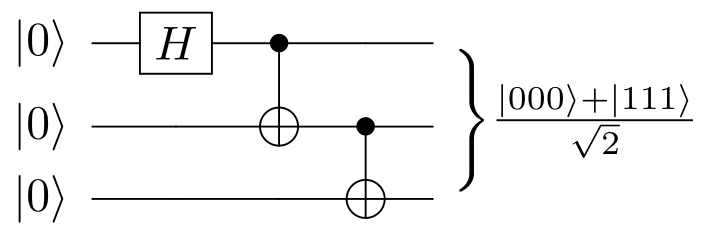

#### Practice:

The Classiq library also has a GHZ state preparation built-in (see `prepare_ghz_state`), but here you will try to implemnt it yourself.

In [11]:
from classiq import *


@qfunc
def main(reg: Output[QArray]):
    allocate(6, reg)
    # your code here
    pass


qprog_task = synthesize(main)
show(qprog_task)

Quantum program link: https://platform.classiq.io/circuit/2zJHBIfojHo5Fzga1M4lDAnprRJ


#### The full solution for your reference

In [12]:
from classiq import *


@qfunc
def main(reg: Output[QArray]):
    allocate(6, reg)
    H(reg[0])
    repeat(
        count=reg.len - 1,
        iteration=lambda index: CX(ctrl=reg[index], target=reg[index + 1]),
    )


qprog_solution = synthesize(main)
show(qprog_solution)

Quantum program link: https://platform.classiq.io/circuit/2zJHBdIcIYk5iWQPsDxJZt2ZwAV
